In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'AAPl' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2009-12-23')['Adj Close']

In [3]:
data
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,AAPl
Date,
2019-12-27,-0.000380
2019-12-30,0.005918
2019-12-31,0.007280
2020-01-02,0.022560
2020-01-03,-0.009770


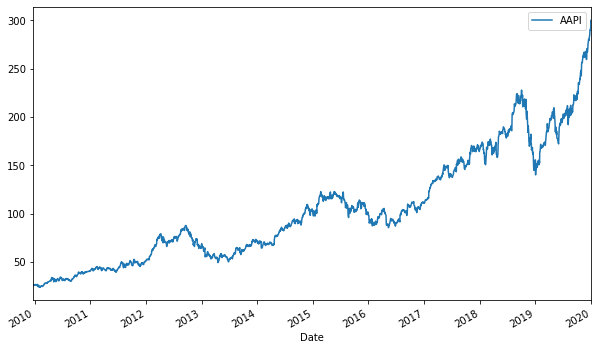

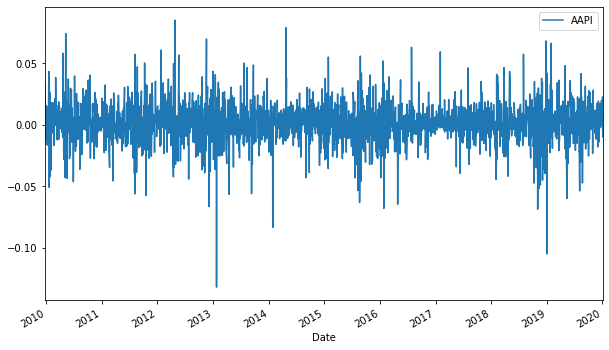

In [4]:
data.plot(figsize=(10, 6))
log_returns.plot(figsize = (10, 6))

In [5]:
mean = log_returns.mean()
mean

AAPl    0.00098
dtype: float64

In [6]:
var = log_returns.var()
var

AAPl    0.000264
dtype: float64

In [7]:
drift = mean - (0.5 * var)
drift

AAPl    0.000848
dtype: float64

In [8]:
drift.values

array([0.00084766])

In [9]:
std = log_returns.std()
std.values

array([0.0162429])

In [10]:
type(drift)
type(std)

pandas.core.series.Series

In [11]:
np.array(drift)
type(np.array(drift))
drift.values
std.values

array([0.0162429])

In [12]:
t_intervals = 60
iterations = 1000

In [13]:
np.random.seed(320)

In [14]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01009418, 0.99024299, 1.04187681, ..., 0.99604232, 0.96540298,
        0.99465883],
       [1.02729425, 1.01133724, 1.01521916, ..., 0.99920121, 1.00488022,
        1.00548825],
       [0.96479358, 0.98424823, 0.98606374, ..., 1.00678986, 1.01203843,
        0.99449954],
       ...,
       [1.01199736, 0.97912873, 0.98589106, ..., 0.99247577, 1.01558249,
        0.99298008],
       [1.03612105, 0.99689228, 1.04633529, ..., 1.01751262, 1.01758477,
        0.9925838 ],
       [0.98077834, 0.99532453, 0.98890795, ..., 0.96799401, 0.99655136,
        0.98984316]])

In [15]:
S0 = data.iloc[-1]
S0

AAPl    297.429993
Name: 2020-01-03 00:00:00, dtype: float64

In [16]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
price_list[0]
price_list[0] = S0
price_list

array([[297.42999268, 297.42999268, 297.42999268, ..., 297.42999268,
        297.42999268, 297.42999268],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [18]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[297.42999268, 297.42999268, 297.42999268, ..., 297.42999268,
        297.42999268, 297.42999268],
       [305.54812178, 300.80202778, 301.95662611, ..., 297.1924097 ,
        298.88151581, 299.06236231],
       [294.79086699, 296.06386306, 297.74848098, ..., 299.21030405,
        302.47957858, 297.4173809 ],
       ...,
       [345.56386544, 311.14099746, 303.35686109, ..., 351.7314301 ,
        379.65010784, 342.67831073],
       [358.04599359, 310.17405935, 317.41298955, ..., 357.89116947,
        386.32616902, 340.13694056],
       [351.1637552 , 308.72384948, 313.89222921, ..., 346.43650675,
        384.9938709 , 336.68222282]])

In [23]:
price_list
price_list.shape
len(price_list)

60

In [24]:
price_list[0]

array([297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42999268,
       297.42999268, 297.42999268, 297.42999268, 297.42

In [25]:
daily_list = []
for n in range (0,60):
    if n <= 60:
        mean1 = price_list[n].mean()
        daily_list.append(mean1)

In [26]:
daily_list

[297.42999267578125,
 297.6933019424726,
 297.825066561836,
 298.1560576998045,
 298.4250423390703,
 298.67900482172047,
 298.87279334021883,
 298.8320211504807,
 299.34991388063463,
 299.7393786120108,
 299.987245016665,
 300.31930498836545,
 300.6198308237477,
 301.0744937314468,
 301.3414949246858,
 301.5716746886078,
 301.8465086346759,
 302.2371413897756,
 302.66789739104905,
 303.08833618558606,
 303.3144929825866,
 303.7662586678377,
 304.06991872765917,
 304.3843363564342,
 304.81801536778175,
 305.3092888218325,
 305.2387598830989,
 305.72380612154194,
 305.9867695675685,
 306.08232014482445,
 306.41893305456364,
 306.7567474540974,
 306.75547706962016,
 307.18943076231596,
 307.43600138670126,
 307.70634137884133,
 307.91105270754593,
 308.19224183471584,
 308.47576637886556,
 308.548784540655,
 308.95400644471556,
 309.4999482770107,
 309.8214532136569,
 310.42246762899623,
 310.86583441163293,
 311.5020750226016,
 311.9972640210687,
 312.19881588688503,
 312.84356267716055,

In [27]:
def averagenum(num):
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

In [28]:
averagenum(daily_list)
k =  averagenum(daily_list)
k

306.322945829233

In [29]:
St = daily_list[-1]
St

314.86771925456355

In [30]:
def call_payoff(St,k):
    return max(St-k, 0)
    print (call_payoff)

In [31]:
call_payoff(St,k)

8.544773425330561

In [32]:
r = 0.05
T = 60/252

In [33]:
import math
discount_factor = math.exp(-r * T)

In [34]:
option_price = discount_factor  * call_payoff(St,k)
option_price

8.44365303352324